# Smartwatch Data Analysis and Price Prediction

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [50]:
data = pd.read_csv(r"C:\Users\hp\Downloads\Smart watch prices.csv")

In [51]:
data.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [52]:
data.shape

(379, 13)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  378 non-null    object 
 8   Battery Life (days)        378 non-null    object 
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(1), object(12)
memory usage: 38.6+ KB


# Data Cleaning and Manipulating

In [54]:
data.isnull().sum()

Brand                        1
Model                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          1
Heart Rate Monitor           1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64

In [55]:
data[data.isnull().any(axis=1)]

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
9,Skagen,Jorn Hybrid HR,NaN,Bluetooth,NaN,NaN,NaN,30,14,Yes,No,No,$195
11,Timex,Metropolitan R,NaN,Bluetooth,AMOLED,1.2,390 x 390,30,3,Yes,No,No,$179
21,Fossil,Collider,Hybrid OS,"Bluetooth, Wi-Fi",Analog,NaN,NaN,30,14,Yes,No,Yes,$195
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,Timex,Metropolitan+,Timex OS,Bluetooth,E-Ink,1.5,NaN,50,1,Yes,No,No,$79


#### All the null values here can't be replaced by any value so it is better to remove all null values

In [56]:
data = data.dropna()

In [57]:
data=data.reset_index(drop=True)

In [58]:
data.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [59]:
data.nunique()

Brand                         42
Model                        135
Operating System              34
Connectivity                   5
Display Type                  26
Display Size (inches)         31
Resolution                    36
Water Resistance (meters)      7
Battery Life (days)           30
Heart Rate Monitor             1
GPS                            2
NFC                            2
Price (USD)                   49
dtype: int64

In [60]:
data["Heart Rate Monitor"].unique()

array(['Yes'], dtype=object)

In [61]:
data.drop("Heart Rate Monitor",axis=1,inplace=True)

In [62]:
data.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,$299


In [63]:
data.dtypes

Brand                         object
Model                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Resolution                    object
Water Resistance (meters)     object
Battery Life (days)           object
GPS                           object
NFC                           object
Price (USD)                   object
dtype: object

In [64]:
data["Resolution"].unique()

array(['396 x 484', '450 x 450', '416 x 416', '336 x 336', '466 x 466',
       '360 x 360', '372 x 430', '454 x 454', '240 x 240', '394 x 324',
       '240 x 201', '368 x 448', '390 x 390', '400 x 400', '324 x 394',
       '320 x 320', '348 x 442', '402 x 476', '480 x 480', '176 x 176',
       '300 x 300', '200 x 200', '280 x 280', '128 x 128', '240 x 198',
       '280 x 456', '328 x 328', '960 x 192', '348 x 250', '320 x 300',
       '320 x 302', '228 x 172', '160 x 160', '260 x 260', '126 x 36',
       '326 x 326'], dtype=object)

In [65]:
data["Hor_pixels"] = data["Resolution"].str.split("x").str.get(0).str.strip().astype(int)

In [66]:
data["Ver_pixels"] = data["Resolution"].str.split("x").str.get(1).str.strip().astype(int)

In [67]:
data.drop("Resolution",axis=1,inplace=True)

In [68]:
data["Water Resistance (meters)"].unique()

array(['50', '30', '100', '1.5', 'Not specified', '200', '10'],
      dtype=object)

In [69]:
data[data["Water Resistance (meters)"]=="Not specified"]

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Water Resistance (meters),Battery Life (days),GPS,NFC,Price (USD),Hor_pixels,Ver_pixels
182,Nubia,Alpha,Nubia OS,"Bluetooth, Wi-Fi, Cellular",OLED,4.01,Not specified,48 hours,Yes,Yes,$449,960,192


#### Since it is only one raw having Water Resistance (meters) value as not specified so I am removing it.

In [70]:
data.drop(182,inplace=True)

In [71]:
data["Water Resistance (meters)"].unique()

array(['50', '30', '100', '1.5', '200', '10'], dtype=object)

In [72]:
data["Water Resistance (meters)"]=data["Water Resistance (meters)"].astype(float)

In [73]:
data["Battery Life (days)"].unique()

array(['18', '40', '11', '6', '24', '14', '2', '4', '12', '30', '45', '5',
       '10', '3', '48', '7', '16', '9', '25', '72', '60', '56', '70', '1',
       '15', 'Unlimited', '1.5', '20', '8'], dtype=object)

In [74]:
data[data["Battery Life (days)"]=="Unlimited"]

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Water Resistance (meters),Battery Life (days),GPS,NFC,Price (USD),Hor_pixels,Ver_pixels
200,Matrix,PowerWatch 2,Matrix OS,"Bluetooth, Wi-Fi",LCD,1.2,200.0,Unlimited,Yes,Yes,$499,360,360
239,Matrix,PowerWatch 2,Matrix OS,"Bluetooth, Wi-Fi",LCD,1.2,200.0,Unlimited,Yes,Yes,$499,228,172
349,Matrix,PowerWatch 2,Proprietary OS,Bluetooth,LCD,1.2,200.0,Unlimited,Yes,No,$499,228,172


#### Here unlimited Battery Life can't be replace by any specific number so for that I am replcing it these values by maximum of Battery Life.

In [75]:
data["Battery Life (days)"] = data["Battery Life (days)"].replace("Unlimited",0)

In [76]:
data["Battery Life (days)"]=data["Battery Life (days)"].astype(float)

In [77]:
data["Battery Life (days)"]=data["Battery Life (days)"].replace(0,data["Battery Life (days)"].max())

In [78]:
data.dtypes

Brand                         object
Model                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Water Resistance (meters)    float64
Battery Life (days)          float64
GPS                           object
NFC                           object
Price (USD)                   object
Hor_pixels                     int32
Ver_pixels                     int32
dtype: object

In [79]:
data["Price (USD)"] = data["Price (USD)"].str.replace("$","",regex=False).str.replace(",","",regex=False).astype(int)

In [80]:
data.dtypes

Brand                         object
Model                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Water Resistance (meters)    float64
Battery Life (days)          float64
GPS                           object
NFC                           object
Price (USD)                    int32
Hor_pixels                     int32
Ver_pixels                     int32
dtype: object

In [81]:
data.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Water Resistance (meters),Battery Life (days),GPS,NFC,Price (USD),Hor_pixels,Ver_pixels
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,50.0,18.0,Yes,Yes,399,396,484
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,50.0,40.0,Yes,Yes,249,450,450
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,50.0,11.0,Yes,No,399,416,416
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,50.0,6.0,Yes,Yes,229,336,336
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,30.0,24.0,Yes,Yes,299,416,416


In [93]:
data.nunique()

Brand                         41
Model                        134
Operating System              33
Connectivity                   5
Display Type                  26
Display Size (inches)         30
Water Resistance (meters)      6
Battery Life (days)           28
GPS                            2
NFC                            2
Price (USD)                   48
Hor_pixels                    29
Ver_pixels                    34
dtype: int64

In [94]:
data.describe()

,Display Size (inches),Water Resistance (meters),Battery Life (days),Price (USD),Hor_pixels,Ver_pixels
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.356139,53.010724,12.710456,314.201072,362.289544,366.970509
std,0.171283,27.076329,13.503109,202.995974,80.528108,86.121861
min,0.900000,1.500000,1.000000,49.000000,126.000000,36.000000
25%,1.200000,50.000000,3.000000,199.000000,324.000000,326.000000
50%,1.390000,50.000000,10.000000,279.000000,368.000000,390.000000
75%,1.400000,50.000000,16.000000,329.000000,454.000000,454.000000
max,2.100000,200.000000,72.000000,1800.000000,480.000000,484.000000


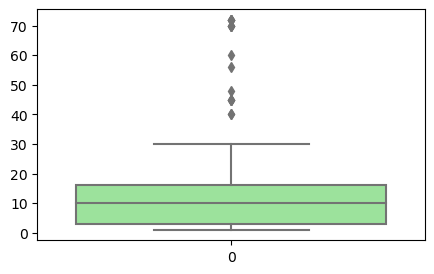

In [266]:
plt.figure(figsize=(5,3));
sns.boxplot(data["Battery Life (days)"],color="lightgreen");

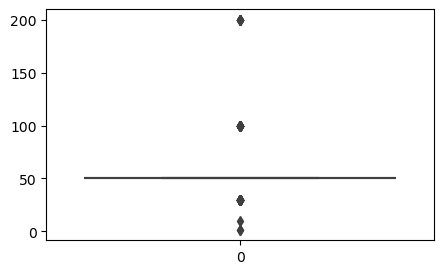

In [268]:
plt.figure(figsize=(5,3));
sns.boxplot(data["Water Resistance (meters)"]);

In [47]:
list = ["Battery Life (days)" , "Water Resistance (meters)"]
for i in list:
    upper = data[i].mean() + 3*data[i].std()
    lower = data[i].mean() - 3*data[i].std()
    data.loc[data[i] > upper , i] = upper
    data.loc[data[i] < lower , i] = lower

# Data Visulisation

#### Top 5 Brands by number of models

In [82]:
data.groupby("Brand").agg(No_of_models=("Model","count")).sort_values("No_of_models",ascending=False).head()

,No_of_models
Brand,
Garmin,34
Fitbit,24
Mobvoi,24
Fossil,22
Amazfit,20


#### Number of models having GPS and not having GPS of brand given by user

In [83]:
a = input("Enter Brand Name: ")
data.groupby(["Brand","GPS"]).agg(No_of_watches=("Model","count")).loc[a]

Enter Brand Name: Apple


,No_of_watches
GPS,
Yes,14


#### Number of models by operating systems of brand given by user

In [84]:
a = input("Enter Brand Name: ")
data.groupby(["Brand","Operating System"]).agg(No_of_models=("Model","count")).loc[a]

Enter Brand Name: Apple


,No_of_models
Operating System,
watchOS,14


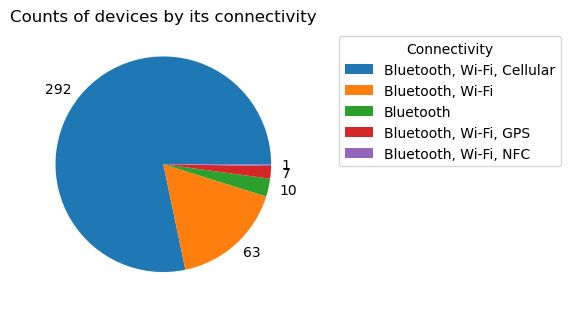

In [85]:
plt.figure(figsize=(3.5,3.5))
plt.pie(np.array(data["Connectivity"].value_counts()),labels=np.array(data["Connectivity"].value_counts().unique()))
plt.legend(data["Connectivity"].unique(), loc='upper right', bbox_to_anchor=(2,1),title="Connectivity")
plt.title("Counts of devices by its connectivity")
plt.show()

In [86]:
Disp_3=data.groupby("Display Type").agg(No_of_watches=("Display Type","count")).sort_values("No_of_watches",ascending=False).head(3)

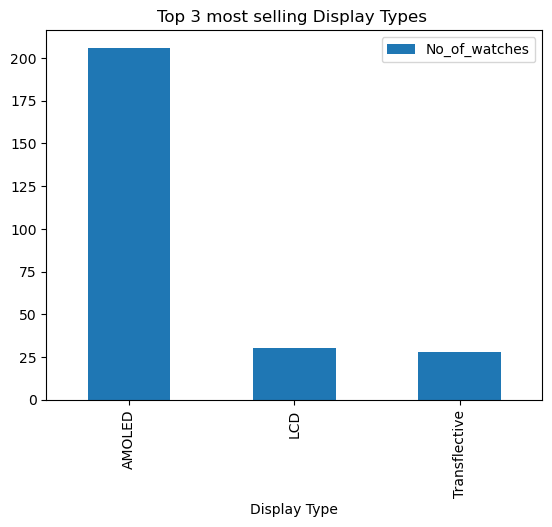

In [87]:
Disp_3.plot(kind="bar")
plt.title("Top 3 most selling Display Types ")
plt.show()

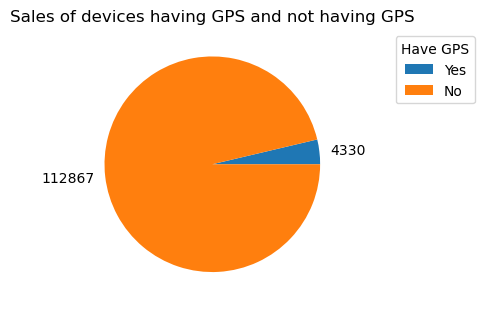

In [88]:
plt.figure(figsize=(3.5,3.5))
GPS=data.groupby("GPS").agg(Total_selling=("Price (USD)","sum"))["Total_selling"]
plt.pie(GPS,labels=GPS)
plt.legend(data["GPS"].unique(),title="Have GPS",bbox_to_anchor=(1.5,1))
plt.title("Sales of devices having GPS and not having GPS")
plt.show()

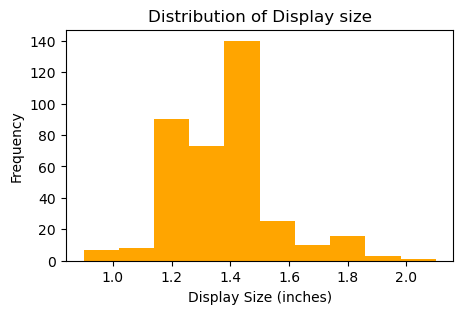

In [89]:
plt.figure(figsize=(5,3))
plt.hist(data["Display Size (inches)"],color="orange")
plt.xlabel("Display Size (inches)")
plt.ylabel("Frequency")
plt.title("Distribution of Display size")
plt.show()

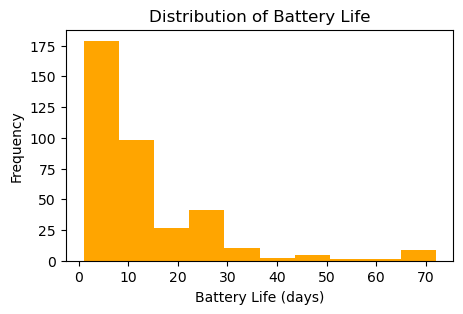

In [90]:
plt.figure(figsize=(5,3))
plt.hist(data["Battery Life (days)"],color="orange")
plt.xlabel("Battery Life (days)")
plt.ylabel("Frequency")
plt.title("Distribution of Battery Life")
plt.show()

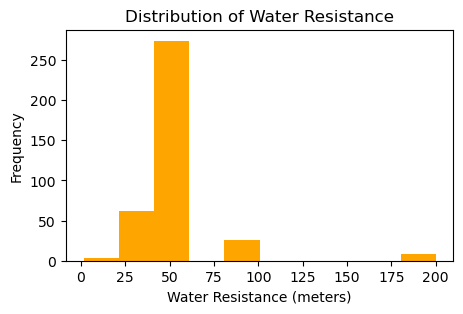

In [91]:
plt.figure(figsize=(5,3))
plt.hist(data["Water Resistance (meters)"],color="orange")
plt.xlabel("Water Resistance (meters)")
plt.ylabel("Frequency")
plt.title("Distribution of Water Resistance")
plt.show()

# Feature Engenieering

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
LE = LabelEncoder()

In [50]:
data["Brand"]=LE.fit_transform(data["Brand"])

In [51]:
LE1 = LabelEncoder()

In [52]:
data["Model"] = LE.fit_transform(data["Model"])

In [53]:
LE2 = LabelEncoder()

In [54]:
data["Operating System"] = LE2.fit_transform(data["Operating System"])

In [55]:
LE3 = LabelEncoder()

In [56]:
data["Display Type"] = LE3.fit_transform(data["Display Type"])

In [57]:
Conn = pd.get_dummies(data["Connectivity"]).astype(int)
GPS = pd.get_dummies(data["GPS"]).astype(int)
NFC = pd.get_dummies(data["NFC"]).astype(int)

In [58]:
df=pd.concat((data,Conn,GPS,NFC),axis=1)

In [59]:
df.drop(["Connectivity","GPS","NFC"],axis=1,inplace=True)

In [60]:
df.head()

,Brand,Model,Operating System,Display Type,Display Size (inches),Water Resistance (meters),Battery Life (days),Price (USD),Hor_pixels,Ver_pixels,Bluetooth,"Bluetooth, Wi-Fi","Bluetooth, Wi-Fi, Cellular","Bluetooth, Wi-Fi, GPS","Bluetooth, Wi-Fi, NFC",No,Yes,No,Yes
0,1,124,32,16,1.90,50.0,18.0,399,396,484,0,0,1,0,0,0,1,0,1
1,29,34,29,0,1.40,50.0,40.0,249,450,450,0,0,1,0,0,0,1,0,1
2,8,102,9,0,1.30,50.0,11.0,399,416,416,0,1,0,0,0,0,1,1,0
3,6,106,7,0,1.58,50.0,6.0,229,336,336,0,1,0,0,0,0,1,0,1
4,7,41,29,0,1.28,30.0,24.0,299,416,416,0,1,0,0,0,0,1,0,1


<Axes: xlabel='Price (USD)', ylabel='Density'>

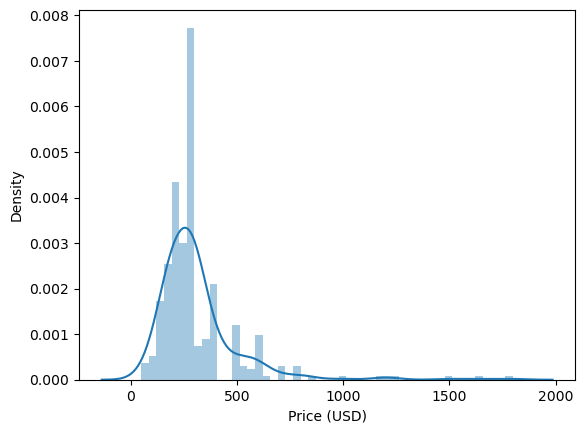

In [61]:
sns.distplot(df["Price (USD)"])

In [62]:
x=df.drop("Price (USD)", axis = 1 )
y=df["Price (USD)"]

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85,random_state=30)

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler=MinMaxScaler()

# Model Selection

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model=LinearRegression()

In [69]:
model.fit(x_train,y_train)

LinearRegression()

In [70]:
model.score(x_train,y_train)

0.2528333241824918

In [71]:
model.score(x_test,y_test)

-0.039592689522574664

In [72]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [73]:
list = [SVR,DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressor]

In [74]:
for i in list:
    model = i()
    model.fit(x_train,y_train)
    print(model.score(x_train,y_train),"\t",model.score(x_test,y_test),"\t",i)

-0.013218669176280784 	 -0.0013717817974312485 	 <class 'sklearn.svm._classes.SVR'>
0.9952816976761735 	 -1.6026100928052962 	 <class 'sklearn.tree._classes.DecisionTreeRegressor'>
0.9397312035680688 	 0.5835535139312196 	 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.8314749962476017 	 0.6192589058273446 	 <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>


### AdaBoostRegressor achived the highest accuracy, making it the most suitable model for our predictive task

In [172]:
Final_model = AdaBoostRegressor(n_estimators=480,random_state=40)

In [173]:
Final_model.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=480, random_state=40)

In [174]:
Final_model.score(x_train,y_train)

0.840156702967544

In [175]:
Final_model.score(x_test,y_test)

0.7016342453260521

In [178]:
y_pred = Final_model.predict(x_test)

# Model Evaluation

In [176]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [182]:
mean_absolute_error(y_test,y_pred)

76.79363294082354

In [185]:
np.sqrt(mean_squared_error(y_test,y_pred))

91.57752161014425

In [184]:
r2_score(y_test,y_pred)

0.7016342453260521

### Since R2 Score is in the range 50 to 80 it is valuable so this machine learning model is acceptable.